<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/ANN_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
pd.set_option('display.max_columns', None)
data.head(5)

data.drop(['id', 'date'], axis = 1, inplace = True)
# data.drop(['id', 'date','lat','long'], axis = 1, inplace = True)
# data.drop(['id', 'date', 'yr_built', 'yr_renovated', 'lat', 'long', 'zipcode'], axis = 1, inplace = True)

data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(data.shape)

(21613, 19)


In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [7]:
import numpy as np
data['zip_code_a'] = np.where((data['zipcode'] > 98000) & (data['zipcode'] <= 98010), 1, 0)
data['zip_code_b'] = np.where((data['zipcode'] > 98010) & (data['zipcode'] <= 98020), 1, 0)
data['zip_code_c'] = np.where((data['zipcode'] > 98020) & (data['zipcode'] <= 98030), 1, 0)
data['zip_code_d'] = np.where((data['zipcode'] > 98030) & (data['zipcode'] <= 98040), 1, 0)
data['zip_code_e'] = np.where((data['zipcode'] > 98040) & (data['zipcode'] <= 98050), 1, 0)
data['zip_code_f'] = np.where((data['zipcode'] > 98050) & (data['zipcode'] <= 98060), 1, 0)
data['zip_code_g'] = np.where((data['zipcode'] > 98060) & (data['zipcode'] <= 98070), 1, 0)
data['zip_code_h'] = np.where((data['zipcode'] > 98070) & (data['zipcode'] <= 98080), 1, 0)
data['zip_code_i'] = np.where((data['zipcode'] > 98080) & (data['zipcode'] <= 98090), 1, 0)
data['zip_code_j'] = np.where((data['zipcode'] > 98090) & (data['zipcode'] <= 98100), 1, 0)
data['zip_code_k'] = np.where((data['zipcode'] > 98100) & (data['zipcode'] <= 98110), 1, 0)
data['zip_code_l'] = np.where((data['zipcode'] > 98110) & (data['zipcode'] <= 98120), 1, 0)
data['zip_code_m'] = np.where((data['zipcode'] > 98120) & (data['zipcode'] <= 98130), 1, 0)
data['zip_code_n'] = np.where((data['zipcode'] > 98130) & (data['zipcode'] <= 98140), 1, 0)
data['zip_code_o'] = np.where((data['zipcode'] > 98140) & (data['zipcode'] <= 98150), 1, 0)
data['zip_code_p'] = np.where((data['zipcode'] > 98150) & (data['zipcode'] <= 98160), 1, 0)
data['zip_code_q'] = np.where((data['zipcode'] > 98160) & (data['zipcode'] <= 98170), 1, 0)
data['zip_code_r'] = np.where((data['zipcode'] > 98170) & (data['zipcode'] <= 98180), 1, 0)
data['zip_code_s'] = np.where((data['zipcode'] > 98180) & (data['zipcode'] <= 98190), 1, 0)
data['zip_code_t'] = np.where(data['zipcode'] > 98190, 1, 0)

In [8]:
data.drop(['zipcode'], axis = 1, inplace = True)

In [9]:
data.shape

(21613, 38)

In [10]:
data['yr_built_a'] = np.where((data['yr_built']) > 1900 & (data['yr_built'] <= 1910),1,0)
data['yr_built_b'] = np.where((data['yr_built']) > 1910 & (data['yr_built'] <= 1920),1,0)
data['yr_built_c'] = np.where((data['yr_built']) > 1920 & (data['yr_built'] <= 1930),1,0)
data['yr_built_d'] = np.where((data['yr_built']) > 1930 & (data['yr_built'] <= 1940),1,0)
data['yr_built_e'] = np.where((data['yr_built']) > 1940 & (data['yr_built'] <= 1950),1,0)
data['yr_built_f'] = np.where((data['yr_built']) > 1950 & (data['yr_built'] <= 1960),1,0)
data['yr_built_g'] = np.where((data['yr_built']) > 1960 & (data['yr_built'] <= 1970),1,0)
data['yr_built_h'] = np.where((data['yr_built']) > 1970 & (data['yr_built'] <= 1980),1,0)
data['yr_built_i'] = np.where((data['yr_built']) > 1980 & (data['yr_built'] <= 1990),1,0)
data['yr_built_j'] = np.where((data['yr_built']) > 1990 & (data['yr_built'] <= 2000),1,0)
data['yr_built_k'] = np.where((data['yr_built']) > 2000 & (data['yr_built'] <= 2010),1,0)
data['yr_built_l'] = np.where((data['yr_built']) > 2010,1,0)


In [11]:
data.drop(['yr_built'], axis = 1, inplace = True)

In [12]:
pd.set_option('display.max_rows', None)
# data.groupby('yr_renovated')['price'].count()
data['yr_renovated'].unique()


array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [13]:
data['yr_renovated_a'] = np.where((data['yr_renovated']) > 1900 & (data['yr_renovated'] <= 1910),1,0)
data['yr_renovated_b'] = np.where((data['yr_renovated']) > 1910 & (data['yr_renovated'] <= 1920),1,0)
data['yr_renovated_c'] = np.where((data['yr_renovated']) > 1920 & (data['yr_renovated'] <= 1930),1,0)
data['yr_renovated_d'] = np.where((data['yr_renovated']) > 1930 & (data['yr_renovated'] <= 1940),1,0)
data['yr_renovated_e'] = np.where((data['yr_renovated']) > 1940 & (data['yr_renovated'] <= 1950),1,0)
data['yr_renovated_f'] = np.where((data['yr_renovated']) > 1950 & (data['yr_renovated'] <= 1960),1,0)
data['yr_renovated_g'] = np.where((data['yr_renovated']) > 1960 & (data['yr_renovated'] <= 1970),1,0)
data['yr_renovated_h'] = np.where((data['yr_renovated']) > 1970 & (data['yr_renovated'] <= 1980),1,0)
data['yr_renovated_i'] = np.where((data['yr_renovated']) > 1980 & (data['yr_renovated'] <= 1990),1,0)
data['yr_renovated_j'] = np.where((data['yr_renovated']) > 1990 & (data['yr_renovated'] <= 2000),1,0)
data['yr_renovated_k'] = np.where((data['yr_renovated']) > 2000 & (data['yr_renovated'] <= 2010),1,0)
data['yr_renovated_l'] = np.where((data['yr_renovated']) > 2010,1,0)
data['yr_renovated_m'] = np.where((data['yr_renovated']) <= 1900,1,0)

In [14]:
data.drop(['yr_renovated'], axis = 1, inplace = True)

In [15]:
data.shape

(21613, 61)

In [16]:
data['grade'].value_counts
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [17]:
data['waterfront'].unique()

array([0, 1])

In [18]:
data['view'].unique()

array([0, 3, 4, 2, 1])

In [19]:
data['condition'].unique()

array([3, 5, 4, 1, 2])

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = OneHotEncoder()
encoder_condition_df = pd.DataFrame(encoder.fit_transform(data[['condition']]).toarray())
encoder_condition_df.columns = ['condition_0','condition_1','condition_2','condition_3','condition_4']

data = data.join(encoder_condition_df)
data.drop(['condition'], axis = 1, inplace = True)

data.shape
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,zip_code_a,zip_code_b,zip_code_c,zip_code_d,zip_code_e,zip_code_f,zip_code_g,zip_code_h,zip_code_i,zip_code_j,zip_code_k,zip_code_l,zip_code_m,zip_code_n,zip_code_o,zip_code_p,zip_code_q,zip_code_r,zip_code_s,zip_code_t,yr_built_a,yr_built_b,yr_built_c,yr_built_d,yr_built_e,yr_built_f,yr_built_g,yr_built_h,yr_built_i,yr_built_j,yr_built_k,yr_built_l,yr_renovated_a,yr_renovated_b,yr_renovated_c,yr_renovated_d,yr_renovated_e,yr_renovated_f,yr_renovated_g,yr_renovated_h,yr_renovated_i,yr_renovated_j,yr_renovated_k,yr_renovated_l,yr_renovated_m,condition_0,condition_1,condition_2,condition_3,condition_4
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0.0,0.0,1.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0


In [21]:
encoder = OneHotEncoder()
encoder_grade_df = pd.DataFrame(encoder.fit_transform(data[['grade']]).toarray())
encoder_grade_df.columns = ['grade_0','grade_1','grade_2','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11']

data = data.join(encoder_grade_df)
data.drop(['grade'], axis = 1, inplace = True)

data.shape

(21613, 76)

In [22]:
encoder = OneHotEncoder()
encoder_view_df = pd.DataFrame(encoder.fit_transform(data[['view']]).toarray())
encoder_view_df.columns = ['view_0','view_1','view_2','view_3','view_4']

data = data.join(encoder_view_df)
data.drop(['view'], axis = 1, inplace = True)

data.shape
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,zip_code_a,zip_code_b,zip_code_c,zip_code_d,zip_code_e,zip_code_f,zip_code_g,zip_code_h,zip_code_i,zip_code_j,zip_code_k,zip_code_l,zip_code_m,zip_code_n,zip_code_o,zip_code_p,zip_code_q,zip_code_r,zip_code_s,zip_code_t,yr_built_a,yr_built_b,yr_built_c,yr_built_d,yr_built_e,yr_built_f,yr_built_g,yr_built_h,yr_built_i,yr_built_j,yr_built_k,yr_built_l,yr_renovated_a,yr_renovated_b,yr_renovated_c,yr_renovated_d,yr_renovated_e,yr_renovated_f,yr_renovated_g,yr_renovated_h,yr_renovated_i,yr_renovated_j,yr_renovated_k,yr_renovated_l,yr_renovated_m,condition_0,condition_1,condition_2,condition_3,condition_4,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_0,view_1,view_2,view_3,view_4
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0,770,0,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
encoder = OneHotEncoder()
encoder_waterfront_df = pd.DataFrame(encoder.fit_transform(data[['waterfront']]).toarray())
encoder_waterfront_df.columns = ['waterfront_0','waterfront_1']

data = data.join(encoder_waterfront_df)
data.drop(['waterfront'], axis = 1, inplace = True)

data.shape
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,zip_code_a,zip_code_b,zip_code_c,zip_code_d,zip_code_e,zip_code_f,zip_code_g,zip_code_h,zip_code_i,zip_code_j,zip_code_k,zip_code_l,zip_code_m,zip_code_n,zip_code_o,zip_code_p,zip_code_q,zip_code_r,zip_code_s,zip_code_t,yr_built_a,yr_built_b,yr_built_c,yr_built_d,yr_built_e,yr_built_f,yr_built_g,yr_built_h,yr_built_i,yr_built_j,yr_built_k,yr_built_l,yr_renovated_a,yr_renovated_b,yr_renovated_c,yr_renovated_d,yr_renovated_e,yr_renovated_f,yr_renovated_g,yr_renovated_h,yr_renovated_i,yr_renovated_j,yr_renovated_k,yr_renovated_l,yr_renovated_m,condition_0,condition_1,condition_2,condition_3,condition_4,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_0,view_1,view_2,view_3,view_4,waterfront_0,waterfront_1
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,180000.0,2,1.00,770,10000,1.0,770,0,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21613 non-null  float64
 1   bedrooms        21613 non-null  int64  
 2   bathrooms       21613 non-null  float64
 3   sqft_living     21613 non-null  int64  
 4   sqft_lot        21613 non-null  int64  
 5   floors          21613 non-null  float64
 6   sqft_above      21613 non-null  int64  
 7   sqft_basement   21613 non-null  int64  
 8   lat             21613 non-null  float64
 9   long            21613 non-null  float64
 10  sqft_living15   21613 non-null  int64  
 11  sqft_lot15      21613 non-null  int64  
 12  zip_code_a      21613 non-null  int64  
 13  zip_code_b      21613 non-null  int64  
 14  zip_code_c      21613 non-null  int64  
 15  zip_code_d      21613 non-null  int64  
 16  zip_code_e      21613 non-null  int64  
 17  zip_code_f      21613 non-null 

In [25]:
# scaling all columns except the target column
# the other option below was better than this

# import numpy as np
# numeric_columns = data.select_dtypes(include = np.number)
# numeric_columns

# numeric_column_names = list(numeric_columns.columns)
# print(numeric_column_names)

# numeric_column_names_for_scaling = []
# for column in numeric_column_names:
#     if column != 'price':
#         numeric_column_names_for_scaling.append(column)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data[numeric_column_names_for_scaling] = scaler.fit_transform(data[numeric_column_names_for_scaling])
# data.head(5)

# scaling only non-categorical columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_for_scaling = ['bedrooms','bathrooms','floors', 'sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']
data[columns_for_scaling] = scaler.fit_transform(data[columns_for_scaling])
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,zip_code_a,zip_code_b,zip_code_c,zip_code_d,zip_code_e,zip_code_f,zip_code_g,zip_code_h,zip_code_i,zip_code_j,zip_code_k,zip_code_l,zip_code_m,zip_code_n,zip_code_o,zip_code_p,zip_code_q,zip_code_r,zip_code_s,zip_code_t,yr_built_a,yr_built_b,yr_built_c,yr_built_d,yr_built_e,yr_built_f,yr_built_g,yr_built_h,yr_built_i,yr_built_j,yr_built_k,yr_built_l,yr_renovated_a,yr_renovated_b,yr_renovated_c,yr_renovated_d,yr_renovated_e,yr_renovated_f,yr_renovated_g,yr_renovated_h,yr_renovated_i,yr_renovated_j,yr_renovated_k,yr_renovated_l,yr_renovated_m,condition_0,condition_1,condition_2,condition_3,condition_4,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_0,view_1,view_2,view_3,view_4,waterfront_0,waterfront_1
0,221900.0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.352572,-0.306079,-0.943355,-0.260715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,538000.0,-0.398737,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,1.161568,-0.746341,-0.432686,-0.187868,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,180000.0,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,1.283537,-0.135655,1.070140,-0.172375,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,604000.0,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,-0.283288,-1.271816,-0.914174,-0.284522,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,510000.0,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,0.409550,1.199335,-0.272190,-0.192849,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
data.shape

(21613, 81)

In [27]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,zip_code_a,zip_code_b,zip_code_c,zip_code_d,zip_code_e,zip_code_f,zip_code_g,zip_code_h,zip_code_i,zip_code_j,zip_code_k,zip_code_l,zip_code_m,zip_code_n,zip_code_o,zip_code_p,zip_code_q,zip_code_r,zip_code_s,zip_code_t,yr_built_a,yr_built_b,yr_built_c,yr_built_d,yr_built_e,yr_built_f,yr_built_g,yr_built_h,yr_built_i,yr_built_j,yr_built_k,yr_built_l,yr_renovated_a,yr_renovated_b,yr_renovated_c,yr_renovated_d,yr_renovated_e,yr_renovated_f,yr_renovated_g,yr_renovated_h,yr_renovated_i,yr_renovated_j,yr_renovated_k,yr_renovated_l,yr_renovated_m,condition_0,condition_1,condition_2,condition_3,condition_4,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_0,view_1,view_2,view_3,view_4,waterfront_0,waterfront_1
0,221900.0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.352572,-0.306079,-0.943355,-0.260715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,538000.0,-0.398737,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,1.161568,-0.746341,-0.432686,-0.187868,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,180000.0,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,1.283537,-0.135655,1.070140,-0.172375,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,604000.0,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,-0.283288,-1.271816,-0.914174,-0.284522,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,510000.0,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,0.409550,1.199335,-0.272190,-0.192849,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
features_df = data.drop(['price'], axis = 1)
target_df = data['price']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.2)

In [30]:
import numpy as np

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# X_train = np.asarray(X_train).astype('float32')
# X_test = np.asarray(X_test).astype('float32')
# y_train = np.asarray(y_train).astype('float32')
# y_test = np.asarray(y_test).astype('float32')

# print(type(X_train))
# print(type(y_train))

(17290, 80)
(4323, 80)
(17290,)
(4323,)


In [31]:
DNN = tf.keras.models.Sequential()

In [32]:
DNN.add(tf.keras.layers.Dense(units = 128, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
DNN.add(tf.keras.layers.Dense(units = 128, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 128, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))

DNN.add(tf.keras.layers.Dense(units = 64, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 64, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 64, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))

DNN.add(tf.keras.layers.Dense(units = 32, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 32, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 32, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))

DNN.add(tf.keras.layers.Dense(units = 16, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 16, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))

DNN.add(tf.keras.layers.Dense(units = 8, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))
DNN.add(tf.keras.layers.Dense(units = 4, input_shape = (80, ), kernel_initializer='normal', activation = 'relu'))

# DNN.add(tf.keras.layers.Dense(units = 58, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 58, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 28, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 28, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 14, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 14, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 6, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))
# DNN.add(tf.keras.layers.Dense(units = 3, input_shape = (58, ), kernel_initializer='normal', activation = 'relu'))

In [33]:
DNN.add(tf.keras.layers.Dense(units = 1))

In [34]:
DNN.compile(optimizer = 'adam', loss = 'mae')
r = DNN.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 150)

Epoch 1/150
541/541 [==============================] - 8s 10ms/step - loss: 250399.6250 - val_loss: 118636.6406
Epoch 2/150
541/541 [==============================] - 2s 3ms/step - loss: 113219.6250 - val_loss: 106151.2344
Epoch 3/150
541/541 [==============================] - 2s 3ms/step - loss: 104118.0703 - val_loss: 100069.6016
Epoch 4/150
541/541 [==============================] - 2s 3ms/step - loss: 99713.5078 - val_loss: 96776.5625
Epoch 5/150
541/541 [==============================] - 2s 3ms/step - loss: 96903.5625 - val_loss: 95154.7109
Epoch 6/150
541/541 [==============================] - 2s 3ms/step - loss: 95242.3281 - val_loss: 93580.1953
Epoch 7/150
541/541 [==============================] - 2s 3ms/step - loss: 93946.0547 - val_loss: 92373.8906
Epoch 8/150
541/541 [==============================] - 2s 3ms/step - loss: 92792.7891 - val_loss: 91825.4453
Epoch 9/150
541/541 [==============================] - 2s 3ms/step - loss: 91575.7734 - val_loss: 91551.0859
Epoch 10/150

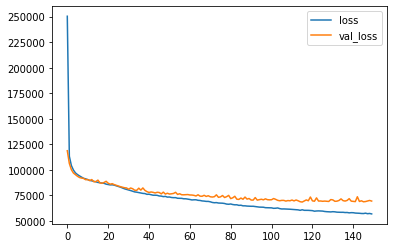

In [35]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [36]:
y_test_pred = DNN.predict(X_test)

In [37]:
y_test


10215     268500.0
19497     380000.0
11964     378000.0
11047     665000.0
12009     750000.0
18551     413450.0
19244     720000.0
6274      549950.0
19294     190000.0
2209     1050000.0
1330      567000.0
9505      525000.0
10235     233703.0
4648      380000.0
12630     230000.0
16106    1425000.0
17632     748000.0
4863      679950.0
14075     640000.0
11279     370000.0
2386      260000.0
19414     504975.0
17015     488000.0
2749      722500.0
627      1042500.0
3521      802000.0
18834     310000.0
13730     325000.0
19608     413100.0
10427    1200000.0
10729     425000.0
14286     975000.0
9205      540000.0
18780     415000.0
5171      169000.0
19446    1900000.0
20101     550000.0
20582     344000.0
18204     818000.0
6336      400000.0
1032      554000.0
2096      383000.0
14051     389000.0
15665     585000.0
18906     503000.0
1134      303000.0
9257      275000.0
6240      635000.0
18275     285000.0
9421      329922.0
9054      395000.0
201       297000.0
10087     20

In [38]:
y_test_pred

array([[281277.38],
       [374466.44],
       [337616.  ],
       ...,
       [294743.06],
       [631211.1 ],
       [561355.44]], dtype=float32)

In [39]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred)
adjusted_r_squared=1-(((1-r_squared)*(53940-1))/(53940-26-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

mae: 69302.55946752834
mse: 14660504689.826582
rmse: 121080.57106665208
r_squared:0.8932196262406541
adjusted_r_squared: 0.8931681305027478
